In [1]:
# Basic imports
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Visualization
from pandas.plotting import scatter_matrix

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

# To balance data
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

# Modeling
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# Accesing the data
df1 = pd.read_csv("C:\\Users\\Diego\\Documents\\Flatiron\\Phase 3\\Project\\Data\\wqdata.csv")

In [3]:
# Looking at the DataFrame
df1

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [4]:
# Info before cleaning
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [5]:
# Unwanted strings in the data
df1[df1['ammonia'] == '#NUM!']

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7551,0.03,#NUM!,0.08,0.79,0.07,0.08,0.05,0.58,0.34,0.00,...,0.183,4.37,1.43,0.007,0.62,2.54,0.07,0.05,0.05,#NUM!
7568,0.06,#NUM!,0.07,1.72,0.08,0.32,0.01,1.11,0.61,0.00,...,0.178,12.10,2.03,0.008,1.37,2.05,0.06,0.10,0.07,#NUM!
7890,0.01,#NUM!,0.08,0.49,0.00,0.07,0.09,0.06,0.72,0.57,...,0.088,9.57,1.45,0.009,7.67,7.70,0.03,0.05,0.02,#NUM!


In [6]:
# Replacing '#NUM!' value with NaN and then converting 'ammonia' and 'is_safe' to float64
df1['ammonia'] = df1['ammonia'].replace('#NUM!', np.nan)

# Dropping nans
df1.dropna(subset=['ammonia', 'is_safe'], axis=0, inplace=True)

# Making ammonia and is_safe to float64
df1['ammonia'] = df1['ammonia'].astype('float64')
df1['is_safe'] = df1['is_safe'].astype('float64')

In [7]:
# Creating a copy and naming my Dataframe
# WQ - Water Quality
WQ = df1.copy()

In [8]:
display(WQ.describe().T)

,count,mean,std,min,25%,50%,75%,max
aluminium,7996.0,0.666396,1.265323,0.00,0.0400,0.070,0.2800,5.05
ammonia,7996.0,14.278212,8.878930,-0.08,6.5775,14.130,22.1325,29.84
arsenic,7996.0,0.161477,0.252632,0.00,0.0300,0.050,0.1000,1.05
barium,7996.0,1.567928,1.216227,0.00,0.5600,1.190,2.4825,4.94
cadmium,7996.0,0.042803,0.036049,0.00,0.0080,0.040,0.0700,0.13
chloramine,7996.0,2.177589,2.567210,0.00,0.1000,0.530,4.2400,8.68
chromium,7996.0,0.247300,0.270663,0.00,0.0500,0.090,0.4400,0.90
copper,7996.0,0.805940,0.653595,0.00,0.0900,0.750,1.3900,2.00
flouride,7996.0,0.771646,0.435423,0.00,0.4075,0.770,1.1600,1.50
bacteria,7996.0,0.319714,0.329497,0.00,0.0000,0.220,0.6100,1.00


In [9]:
# Cleaning
WQ.drop_duplicates(inplace = True)
WQ.info()
# No duplicate rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [10]:
# Cleaning
WQ.dropna(inplace=True)
WQ.isna().sum()
# No NaNs

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [11]:
# Info after cleaning
WQ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [12]:
# Shape before dropping outliers
WQ.shape

(7996, 21)

In [13]:
# List of columns to drop outliers from
columns = ['aluminium',
           'ammonia',
           'arsenic',
           'barium',
           'cadmium',
           'chloramine',
           'chromium',
           'copper', 
           'flouride',
           'bacteria',
           'viruses', 
           'lead', 
           'nitrates',
           'nitrites',
           'mercury', 
           'perchlorate',
           'radium',
           'selenium', 
           'silver',
           'uranium']

# Define the IQR multiplier to identify outliers
iqr_multiplier = 1.5

# Loop over columns to remove upper bound outliers
for column in columns:
    # Calculate the IQR for the column
    q1 = WQ[column].quantile(0.25)
    q3 = WQ[column].quantile(0.75)
    iqr = q3 - q1
    
    # Calculate the upper bound for outliers
    upper_bound = q3 + iqr_multiplier * iqr
    
    # Remove upper bound outliers for the column
    WQ = WQ[WQ[column] <= upper_bound]

In [14]:
# Shape after dropping outliers
WQ.shape

(3822, 21)

In [15]:
# Dataframe after removing outliers
WQ

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
2510,0.07,0.97,0.04,0.36,0.001,0.81,0.05,0.80,0.36,0.64,...,0.087,6.88,1.07,0.010,0.33,2.58,0.03,0.06,0.08,0.0
3999,0.05,8.83,0.00,0.97,0.080,0.09,0.01,0.03,0.05,0.00,...,0.054,16.08,0.93,0.007,3.57,0.28,0.08,0.00,0.02,0.0
4000,0.04,21.09,0.03,2.53,0.010,0.44,0.01,0.07,0.90,0.00,...,0.100,2.01,0.54,0.003,0.86,2.80,0.08,0.05,0.05,0.0
4001,0.01,13.83,0.08,0.32,0.080,0.03,0.09,0.00,0.99,0.05,...,0.078,14.16,0.77,0.006,2.60,3.20,0.07,0.09,0.01,0.0
4002,0.08,10.70,0.03,0.02,0.010,0.16,0.06,0.03,1.08,0.00,...,0.016,1.41,0.10,0.004,0.96,0.06,0.02,0.03,0.05,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7993,0.02,5.24,0.05,0.77,0.020,0.57,0.04,0.03,0.15,0.00,...,0.085,19.41,1.00,0.001,1.68,3.55,0.05,0.07,0.07,1.0
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1.0
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1.0
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1.0


In [16]:
display(WQ.describe().T)

,count,mean,std,min,25%,50%,75%,max
aluminium,3822.0,0.051018,0.029019,0.000,0.030,0.050,0.080,0.10
ammonia,3822.0,13.193619,8.876108,0.000,5.290,12.455,20.860,29.71
arsenic,3822.0,0.050309,0.028973,0.000,0.030,0.050,0.070,0.10
barium,3822.0,0.838116,0.716442,0.000,0.320,0.660,1.010,3.79
cadmium,3822.0,0.050340,0.029320,0.000,0.020,0.050,0.080,0.10
chloramine,3822.0,0.170235,0.166500,0.000,0.050,0.100,0.260,0.81
chromium,3822.0,0.050774,0.028645,0.000,0.030,0.050,0.080,0.10
copper,3822.0,0.724738,0.659552,0.000,0.070,0.605,1.330,2.00
flouride,3822.0,0.774856,0.436749,0.000,0.400,0.780,1.160,1.50
bacteria,3822.0,0.254704,0.318752,0.000,0.000,0.060,0.510,1.00


In [17]:
# Baseline Model

# Define X and y
X = WQ.drop("is_safe", axis=1)
y = WQ["is_safe"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating a logistic regression model
lr = LogisticRegression()

# Fitting the model on the training data
lr.fit(X_train_scaled, y_train)

# Predictions on the test data
y_pred = lr.predict(X_test_scaled)

# Calculate and print the average cross-validation score
cv_score = cross_val_score(lr, X_test_scaled, y_test, cv=10)
print(f'Cross-validation score: {np.mean(cv_score):.2f}')

Cross-validation score: 0.97


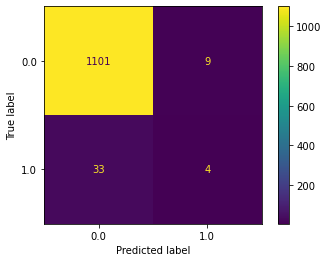

In [18]:
# Looking at error
ConfusionMatrixDisplay.from_estimator(lr, X_test_scaled, y_test);

In [19]:
# Looking at metrics
print(classification_report(y_pred, y_test))

# My baseline model has a bad precision for 1.0 (Safe to drink).
# I'm looking at precision because it's better to use when we don't want false postives.
# My false positive in this case would be classifying water as safe to drink whe it isn't.

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      1134
         1.0       0.11      0.31      0.16        13

    accuracy                           0.96      1147
   macro avg       0.55      0.64      0.57      1147
weighted avg       0.98      0.96      0.97      1147



In [20]:
# Correlations with my target
WQ.corr()["is_safe"].sort_values(ascending=False)

is_safe        1.000000
chloramine     0.022114
aluminium      0.005589
ammonia        0.005568
arsenic        0.004538
flouride       0.003400
perchlorate   -0.006274
cadmium       -0.008877
selenium      -0.012540
radium        -0.016165
silver        -0.021525
uranium       -0.024932
mercury       -0.031926
chromium      -0.032764
barium        -0.037794
lead          -0.075345
nitrates      -0.123153
nitrites      -0.134289
copper        -0.134296
bacteria      -0.136633
viruses       -0.152028
Name: is_safe, dtype: float64

In [21]:
# Visualizing the data to have a better understanding of it
# sns.pairplot(WQ)

# There seems to be some columns that can be classified
# We can see target imbalance (bottom-right side)

In [22]:
# No need to OneHotEncode
WQ["cadmium"].value_counts().unique()

array([417, 396, 390, 388, 384, 373, 364, 357, 203, 192,   1], dtype=int64)

In [23]:
# No need to OneHotEncode
WQ["mercury"].value_counts().unique()

array([447, 417, 393, 383, 382, 352, 351, 343, 329, 248, 177], dtype=int64)

In [24]:
# No need to OneHotEncode
WQ["selenium"].value_counts().unique()

array([444, 413, 405, 388, 384, 363, 359, 358, 322, 195, 191], dtype=int64)

In [25]:
# No need to OneHotEncode
WQ["uranium"].value_counts().unique()

array([469, 445, 439, 435, 413, 388, 387, 353, 279, 214], dtype=int64)

In [26]:
# Checking the viruses columns because it has a weird distribution
WQ["viruses"].value_counts().unique()
# Looks fine

array([559, 219, 206, 199, 185, 181, 172, 163, 153,  70,  59,  53,  52,
        48,  47,  46,  42,  41,  39,  38,  37,  36,  35,  34,  33,  31,
        30,  29,  28,  27,  26,  24,  23,  20,  15,  12], dtype=int64)

In [27]:
# Looking for multicollinearity
corr = WQ.corr() 
corr.style.background_gradient(cmap='coolwarm')
# No relevant multicollinearity

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
aluminium,1.000000,-0.012813,-0.009774,0.031894,0.012579,-0.013781,0.005663,-0.010987,0.026336,-0.016653,-0.003097,0.012755,-0.014850,-0.008583,0.022230,-0.004289,-0.003032,0.010327,0.010873,-0.023463,0.005589
ammonia,-0.012813,1.000000,-0.026619,-0.013189,0.016395,0.004304,0.004371,-0.008290,-0.031002,0.024380,0.144590,-0.032133,0.000615,-0.208803,0.020989,-0.008514,-0.028639,0.035547,-0.007247,0.012942,0.005568
arsenic,-0.009774,-0.026619,1.000000,0.005417,0.003878,0.004070,-0.012145,0.006263,-0.015636,0.024064,0.003106,0.009214,0.003322,0.016082,-0.030474,-0.023222,-0.011706,-0.015043,0.013961,0.004585,0.004538
barium,0.031894,-0.013189,0.005417,1.000000,-0.024420,0.015549,-0.019075,0.020761,-0.013152,-0.006048,-0.007049,0.019534,-0.014458,0.025784,0.003598,-0.016250,-0.013913,0.053127,-0.009823,0.018423,-0.037794
cadmium,0.012579,0.016395,0.003878,-0.024420,1.000000,-0.017529,-0.016518,0.007651,-0.003514,-0.007170,0.010982,0.003153,0.011535,0.005380,-0.032671,0.044780,0.021898,0.008635,-0.004175,-0.028189,-0.008877
chloramine,-0.013781,0.004304,0.004070,0.015549,-0.017529,1.000000,0.000071,0.023643,0.004362,0.007394,-0.006686,0.034831,-0.008843,0.021964,-0.024434,0.008580,-0.002819,0.011192,-0.019598,-0.009995,0.022114
chromium,0.005663,0.004371,-0.012145,-0.019075,-0.016518,0.000071,1.000000,0.006778,0.021821,0.021181,0.045028,-0.019786,-0.010493,-0.004849,-0.001370,0.021133,-0.008344,-0.001721,-0.004935,0.014980,-0.032764
copper,-0.010987,-0.008290,0.006263,0.020761,0.007651,0.023643,0.006778,1.000000,0.007451,0.334934,0.033529,0.046650,0.014623,0.232599,0.013190,-0.023001,-0.060732,-0.003056,-0.005127,0.010288,-0.134296
flouride,0.026336,-0.031002,-0.015636,-0.013152,-0.003514,0.004362,0.021821,0.007451,1.000000,0.005835,0.010591,0.005650,-0.004490,-0.006047,-0.002352,-0.015241,-0.002511,0.024671,0.024863,0.013639,0.003400
bacteria,-0.016653,0.024380,0.024064,-0.006048,-0.007170,0.007394,0.021181,0.334934,0.005835,1.000000,0.463896,0.000438,-0.032274,0.331986,-0.002024,-0.001562,-0.008389,-0.003585,0.004297,0.031730,-0.136633


In [28]:
# Looking at the target imbalance

#Target imbalance
print(WQ["is_safe"].value_counts(),"\n")

# Target imbalance in %
print(WQ["is_safe"].value_counts(normalize = True).round(2))

0.0    3709
1.0     113
Name: is_safe, dtype: int64 

0.0    0.97
1.0    0.03
Name: is_safe, dtype: float64


In [29]:
# New copy for model
wq1 = WQ.copy()

In [30]:
# First Model
X = wq1.drop("is_safe", axis=1)
y = wq1["is_safe"]

# Taking care of the target imbalance
oversampler = SMOTEENN(random_state=42)

# Applying oversampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [31]:
# Checking my target resampled
print(y_resampled.value_counts(),"\n")

# Target resampled in %
print(y_resampled.value_counts(normalize = True).round(2))

1.0    3679
0.0    2945
Name: is_safe, dtype: int64 

1.0    0.56
0.0    0.44
Name: is_safe, dtype: float64


In [32]:
# Splitting my data, using my X and y resampled
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=.25, random_state=42)

# Preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the logistic regression model
lr = LogisticRegression()

# Defining the hyperparameters to search over
lr_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 300, 500, 1000]
}

# Performing grid search
grid_search = GridSearchCV(lr, lr_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Evaluating the best model on the test data
best_lr_model = grid_search.best_estimator_
best_lr_model_score = best_lr_model.score(X_test_scaled, y_test)

In [33]:
# Best model/params
best_lr_model

LogisticRegression(C=10, max_iter=500, penalty='l1', solver='liblinear')

In [34]:
# lr best score
best_lr_model_score

0.9335748792270532

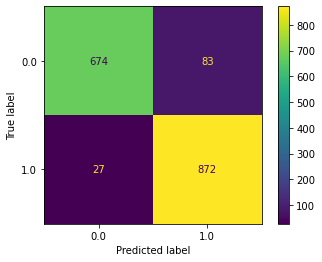

In [35]:
# Looking at error
ConfusionMatrixDisplay.from_estimator(best_lr_model, X_test_scaled, y_test)

In [36]:
# Looking at metrics
y_lr_pred = best_lr_model.predict(X_test_scaled)
print(classification_report(y_test, y_lr_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.89      0.92       757
         1.0       0.91      0.97      0.94       899

    accuracy                           0.93      1656
   macro avg       0.94      0.93      0.93      1656
weighted avg       0.94      0.93      0.93      1656



In [37]:
# Defining a knn model
knn = KNeighborsClassifier()

# Hyperparameters to search over
knn_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'leaf_size': [10, 20, 30],
    'algorithm': ['kd_tree', 'brute'],
    'weights': ['uniform', 'distance']
}

# Performing grid search
grid_search = GridSearchCV(knn, knn_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Evaluating the best model on the test data
best_knn_model = grid_search.best_estimator_
best_knn_model_score = best_knn_model.score(X_test_scaled, y_test)

In [38]:
# Best model/params
best_knn_model

KNeighborsClassifier(algorithm='kd_tree', leaf_size=10, n_neighbors=3)

In [39]:
# knn best score
best_knn_model_score

0.9269323671497585

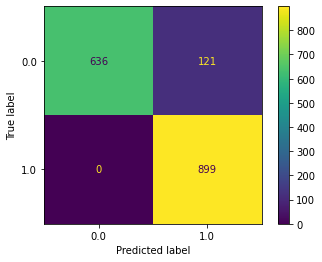

In [40]:
# looking at error
ConfusionMatrixDisplay.from_estimator(best_knn_model, X_test_scaled, y_test);

In [41]:
# Looking at metrics
y_knn_pred = best_knn_model.predict(X_test_scaled)
print(classification_report(y_test, y_knn_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.84      0.91       757
         1.0       0.88      1.00      0.94       899

    accuracy                           0.93      1656
   macro avg       0.94      0.92      0.93      1656
weighted avg       0.94      0.93      0.93      1656



In [ ]:
# Defining the random forest model
rf = RandomForestClassifier()

# Hyperparameters to search over
rf_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Performing grid search
grid_search = GridSearchCV(rf, rf_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Evaluating best model on the test data
best_rf_model = grid_search.best_estimator_
best_rf_model_score = best_rf_model.score(X_test_scaled, y_test)

In [ ]:
# Best model/params
best_rf_model

In [ ]:
# rf best score
best_rf_model_score

In [ ]:
# Looking at error
ConfusionMatrixDisplay.from_estimator(best_rf_model, X_test_scaled, y_test);

In [ ]:
# looking at metrics
y_rf_pred = best_rf_model.predict(X_test_scaled)
print(classification_report(y_test, y_rf_pred))

In [ ]:
# Getting feature importances from rf best model
importances = best_rf_model.feature_importances_

# Feature names
feature_names = X.columns

# Sorting features based on their importances
sorted_indices = importances.argsort()

# Plotting feature importances
plt.barh(range(len(sorted_indices)), importances[sorted_indices])
plt.yticks(range(len(sorted_indices)), feature_names[sorted_indices])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=.25, random_state=42)

# Normalizing the data
pipeline = Pipeline([('numnorm', StandardScaler())])

In [ ]:
# To DataFrame
pd.DataFrame(pipeline.fit_transform(X_train)).head()

In [ ]:
# To DataFrame
pd.DataFrame(pipeline.fit_transform(X_test)).head()

In [ ]:
# Choosing models for my pipeline
estimators = [('lr', best_lr_model),
              ('knn', best_knn_model),
              ('rf', best_rf_model)]
    
sr = StackingClassifier(estimators)

In [ ]:
final_p = Pipeline([('preprocess', pipeline), ('model', sr)])

In [ ]:
final_p.fit(X_train, y_train)

In [ ]:
# Pipeline score
print(final_p.score(X_train, y_train))
print(final_p.score(X_test, y_test))

In [ ]:
# X_tr_pp = pipeline.fit_transform(X_train)
# X_test_pp = pipeline.transform(X_test)

In [ ]:
# Looking at error
ConfusionMatrixDisplay.from_estimator(final_p, X_test, y_test);

# Less error out of all models

In [ ]:
y_pred = final_p.predict(X_test)

In [ ]:
# Looking at metrics
print(classification_report(y_test, y_pred))

# Best precision overall

In [ ]:
# ROC AUC

# Logistic Regression
lr_probs = best_lr_model.predict_proba(X_test_scaled)[:,1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_auc = auc(lr_fpr, lr_tpr)

# K Nearest Neighbors
knn_probs = best_knn_model.predict_proba(X_test_scaled)[:,1]
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
knn_auc = auc(knn_fpr, knn_tpr)

# Random Forest
rf_probs = best_rf_model.predict_proba(X_test_scaled)[:,1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

# Pipeline
pipe_probs = final_p.predict_proba(X_test_scaled)[:,1]
pipe_fpr, pipe_tpr, _ = roc_curve(y_test, pipe_probs)
pipe_auc = auc(pipe_fpr, pipe_tpr)

# Plotting ROC curves
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (AUC = %0.2f)' % lr_auc)
plt.plot(knn_fpr, knn_tpr, label='K Nearest Neighbors (AUC = %0.2f)' % knn_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = %0.2f)' % rf_auc)
plt.plot(pipe_fpr, pipe_tpr, label='Pipeline (AUC = %0.2f)' % pipe_auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()